<a href="https://colab.research.google.com/github/anastaszi/255_datamining/blob/main/HW3_Anastasia_Zimina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
1. K-Means clustering from scratch \
[Link1](https://colab.sandbox.google.com/github/SANTOSHMAHER/Machine-Learning-Algorithams/blob/master/K_Means_algorithm_using_Python_from_scratch_.ipynb) [Link2](https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb) [Link3](https://developers.google.com/machine-learning/clustering/programming-exercise) [Link4](https://colab.sandbox.google.com/github/google/eng-edu/blob/main/ml/clustering/clustering-supervised-similarity.ipynb?utm_source=ss-clustering&utm_campaign=colab-external&utm_medium=referral&utm_content=clustering-supervised-similarity#scrollTo=eExms-TP8Hn6)

1. Hierarchical clustering (not from scratch) \
[Link1](https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb)
1. Gaussian mixture models clustering (not from scratch) \
[Link](https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb)
1. DB Scan clustering (not from scratch) using pycaret library \
[Link1](https://pycaret.org/create-model/) [Link2](https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080) [Link3](http://www.pycaret.org/tutorials/html/CLU101.html)

Provide proper measures of clustering quality as well

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import math
import cv2

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
import scipy.stats



from google.colab import drive
drive.mount('/content/gdrive/')

%matplotlib inline

Mounted at /content/gdrive/


# Import Data

In [ ]:
im = cv2.imread("/content/gdrive/MyDrive/DataMining/image.jpg")
b,g,r = cv2.split(im)       # get b,g,r
im = cv2.merge([r,g,b])
im_flat = np.divide(im, 255)

In [ ]:
im.shape

(5819, 4480, 3)

Reshape the data as we need only color and not position of the pixels

In [ ]:
Ximg = im_flat.reshape(-1, 3)

Repeat the same for the smaller image

In [ ]:
im_2 = cv2.imread("/content/gdrive/MyDrive/DataMining/Colordrop-original.png")
b,g,r = cv2.split(im_2)       # get b,g,r
im_2 = cv2.merge([r,g,b])
im_2_flat = np.divide(im_2, 255)
Ximg_2 = im_2_flat.reshape(-1, 3)

libpng warning: iCCP: known incorrect sRGB profile


In [ ]:
Ximg_2.shape

(1049200, 3)

# KMeans

## Recreate KMeans

Steps: 
* Set initial centroids (random)
* Measure distances between data instances and centroids
* Add data instances as members of closest centroid (E-Step: Expectation step)
* Measure distances between data instances and centroids 
* Re-calculate centroids (M-Step : set the cluster centers to the mean - Maximization step)
* If necessary, re-measure, re-cluster, re-calculate


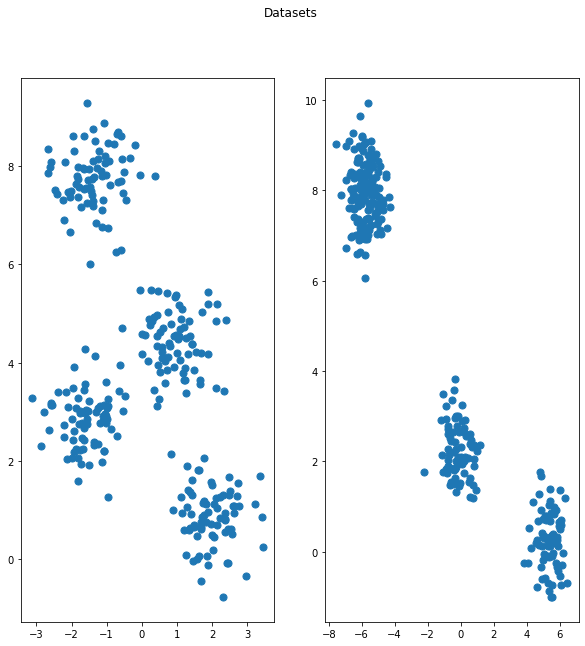

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
X2, y2_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
fig.suptitle('Datasets')
ax1.scatter(X[:, 0], X[:, 1], s=50);
ax2.scatter(X2[:, 0], X2[:, 1], s=50);

In [ ]:
class CustomKMeans():
  def __init__(self, n_clusters, rseed=2, max_iter=300):
    self.n_clusters = n_clusters
    self.rng = np.random.RandomState(rseed)
    self.name = "CustomKMeans(n_clusters={})".format(n_clusters)
    self.rseed = rseed
    self.max_iter = max_iter

  def fit(self, X):
    self.n_features_in_ = X.shape[1]
    # number of rows in the dataset
    n = X.shape[0]
    # array of length n_clusters for indexes of random centroids
    i = self.rng.permutation(n)[:self.n_clusters]
    self.centroids = X[i]
    num_iter = 0
    centers = self.centroids

    while num_iter < self.max_iter:
      #Assign labels based on closest center
      labels = pairwise_distances_argmin(X, centers)
      
      new_centers = np.array([X[labels == i].mean(0) for i in range(self.n_clusters)])
      if np.all(centers == new_centers):
          break
      centers = new_centers
      num_iter += 1
    inertia = 0
    for i in range(n): 
      label = labels[i]
      dist = np.linalg.norm(X[i]-centers[label])
      inertia += dist ** 2
    #safe number of iterations
    self.n_iter_ = num_iter
    # safe labels
    self.labels_ = labels
    # safe inertia
    self.inertia_ = inertia 
    self.centroids = centers
    print(self.name)

  def predict(self, X):
    labels = pairwise_distances_argmin(X, self.centroids)
    return labels
  
  def fit_predict(self, X):
    self.fit(X)
    return self.labels_
  
  def get_params(self):
    keys = ['n_clusters', 'rseed' ,'name', "max_iter"]
    print("Params:")
    for key in keys: 
      print(" {}: {}".format(key, self.__dict__[key]))


### Compare KMeans results

In [ ]:
def plot_comparison(data1, data2, k_original, k_custom):
  fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(15,15))
  fig.suptitle('Datasets')

  ax1.scatter(data1[:, 0], data1[:, 1], c=k_custom.labels_,
              s=50, cmap='viridis');
  ax1.set_title("Dataset1 Kmeans Custom")
  ax2.scatter(data1[:, 0], data1[:, 1], c=k_original.labels_,
              s=50, cmap='viridis');
  ax2.set_title("Dataset1 Kmeans Sklearn")
  ax3.scatter(data2[:, 0], data2[:, 1], c=k_custom.predict(X2),
              s=50, cmap='viridis');
  ax3.set_title("Dataset2 Kmeans Custom")
  ax4.scatter(data2[:, 0], data2[:, 1], c=k_original.predict(X2),
              s=50, cmap='viridis');
  ax4.set_title("Dataset2 Kmeans Sklearn")
  plt.show()

CustomKMeans(n_clusters=5)
Original Kmeans: 188.77323556773723, Custom Kmeans: 193.9792669593348


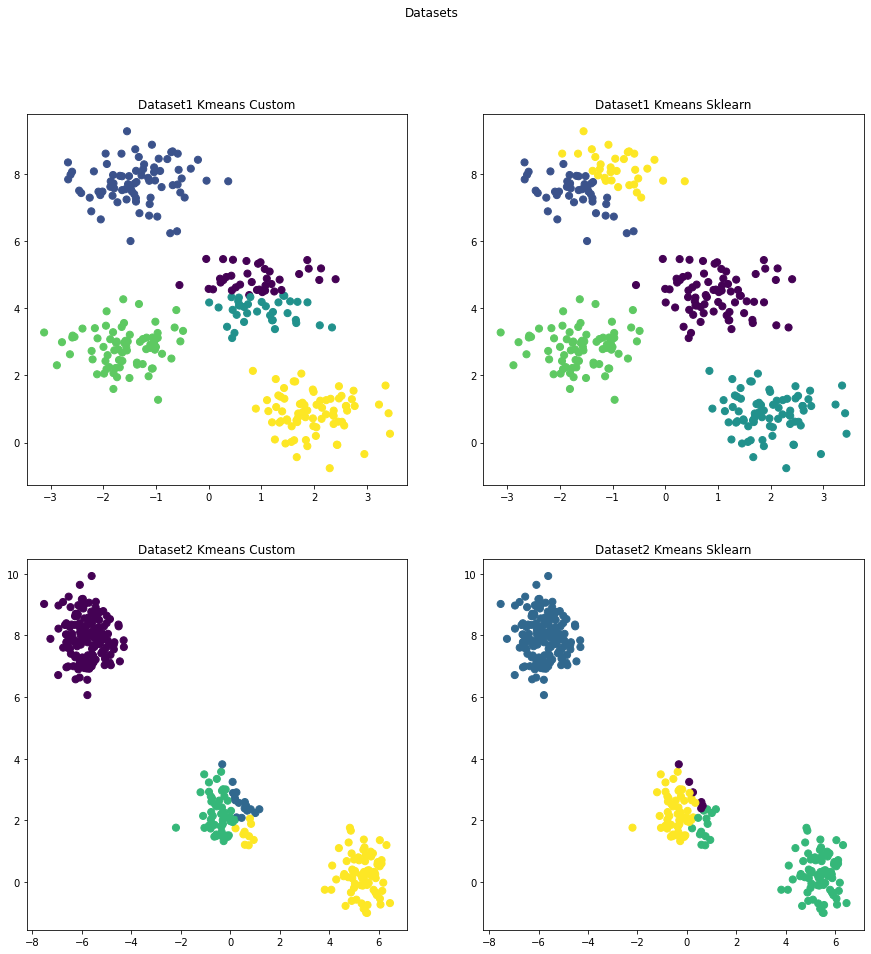

In [ ]:
clusterNumber =  5#@param
kmeans = KMeans(n_clusters=clusterNumber)
kmeans.fit(X)
custom_kmeans = CustomKMeans(clusterNumber)
custom_kmeans.fit(X)
custom_kmeans.inertia_
print("Original Kmeans: {}, Custom Kmeans: {}".format(kmeans.inertia_, custom_kmeans.inertia_))
plot_comparison(X, X2, kmeans, custom_kmeans)

In [ ]:
sse_orig = []
sse_custom = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    ckm = CustomKMeans(k)
    km.fit(X)
    sse_orig.append(km.inertia_)
    ckm.fit(X)
    sse_custom.append(ckm.inertia_)

CustomKMeans(n_clusters=1)
CustomKMeans(n_clusters=2)
CustomKMeans(n_clusters=3)
CustomKMeans(n_clusters=4)
CustomKMeans(n_clusters=5)
CustomKMeans(n_clusters=6)
CustomKMeans(n_clusters=7)
CustomKMeans(n_clusters=8)
CustomKMeans(n_clusters=9)


Text(0.5, 1.0, 'Custom Kmeans')

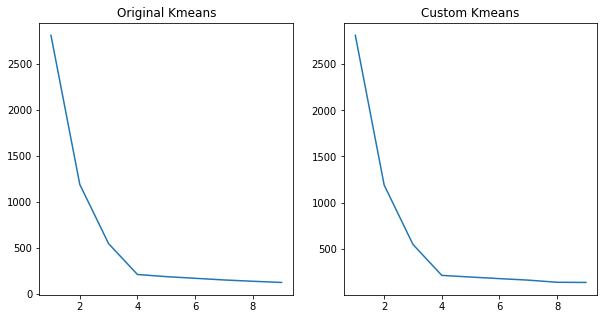

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(k_rng,sse_orig);
axs[0].set_title("Original Kmeans")
axs[1].plot(k_rng, sse_custom);
axs[1].set_title("Custom Kmeans")

## Apply Custom KMeans to the dataset

In [ ]:
numberOfFinalColors =  8#@param

In [ ]:
custom_kmeans = CustomKMeans(numberOfFinalColors, max_iter=10)
custom_kmeans.fit(Ximg)

CustomKMeans(n_clusters=8)


In [ ]:
Ximg_recovered = custom_kmeans.centroids[custom_kmeans.labels_ , :].reshape(im.shape)
Ximg_recovered = Ximg_recovered * 255

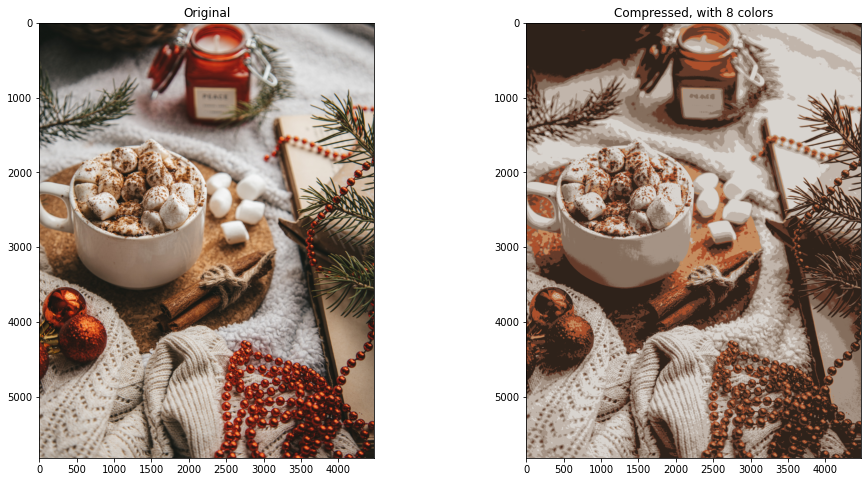

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(im_flat)
ax[0].set_title('Original')
ax[0].grid(False)

ax[1].imshow(Ximg_recovered/255)
ax[1].set_title('Compressed, with %d colors' % numberOfFinalColors)
ax[1].grid(False)


# Hierarchical clustering

The problem of the hierarchical clustering is that it is doesn't work on the large data sets. \
And our current reshaped image has more than 1bln rows. \
In order to proceed I'll take only unique color values. 

## Transform the data


In [ ]:
def get_unique_colors(img):
  df_img = pd.DataFrame(img, columns=['r', 'g', 'b'])
  print("number of rows in the original flattened img: ", df_img.shape[0]);
  df_img.drop_duplicates(inplace=True)
  print("number of unique colors", df_img.shape[0]);
  return df_img

In [ ]:
df_img = get_unique_colors(Ximg_2)

number of rows in the original flattened img:  1049200
number of unique colors 253


## Run Agglomerative Clustering Algorithm

In [ ]:
# use Agglomerative Clustering (default ward)
single = AgglomerativeClustering(numberOfFinalColors)
single.fit(df_img)
single.labels_

array([1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 5, 5, 6, 7, 6, 6, 6, 6, 7, 5, 6,
       5, 7, 6, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 2, 2, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2,
       2, 2, 2, 5, 5, 7, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 0, 0, 0,
       0, 5, 2, 2, 2, 2, 5, 5, 6, 6, 2, 2, 2, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 4, 4, 4, 2, 2, 6, 6, 5, 0, 0, 4, 4, 2, 4, 5, 6, 3, 2, 5, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 2, 1, 3, 3, 3, 3, 6, 6, 0, 0, 0, 0, 4, 1,
       1, 3, 3, 3, 6, 6, 0, 0, 0, 0, 4, 4, 4, 2, 1, 0, 0, 0, 1, 4, 4, 0,
       4, 1, 1, 3, 6, 1, 1, 0, 1, 1, 1, 4, 4, 3, 6, 6, 1, 4, 4, 3, 3, 1,
       1, 1, 1, 1, 1, 4, 4, 3, 3, 6, 1, 1, 1, 4, 3, 1, 1, 1, 1, 4, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3])

Now that we have an array of labels I will add the colors and labels assigned to them to the dictionary

In [ ]:
def add_to_dict(x):
  dict_of_colors[(x['r'], x['g'], x['b'])] = x['label']

In [ ]:
dict_of_colors = {}
df_img['label'] = single.labels_
df_img.apply(add_to_dict, axis=1)
print(dict_of_colors)

{(0.09803921568627451, 0.10196078431372549, 0.11372549019607843): 1.0, (0.1843137254901961, 0.18823529411764706, 0.2): 1.0, (0.09411764705882353, 0.14901960784313725, 0.19607843137254902): 1.0, (0.25098039215686274, 0.28627450980392155, 0.28627450980392155): 1.0, (0.3803921568627451, 0.396078431372549, 0.403921568627451): 6.0, (0.29411764705882354, 0.33725490196078434, 0.33725490196078434): 1.0, (0.30980392156862746, 0.35294117647058826, 0.35294117647058826): 1.0, (0.08235294117647059, 0.12549019607843137, 0.16862745098039217): 1.0, (0.09411764705882353, 0.09803921568627451, 0.11372549019607843): 1.0, (0.47058823529411764, 0.35294117647058826, 0.29411764705882354): 1.0, (0.5882352941176471, 0.6039215686274509, 0.6039215686274509): 6.0, (0.6470588235294118, 0.6745098039215687, 0.6862745098039216): 5.0, (0.6980392156862745, 0.7137254901960784, 0.7176470588235294): 5.0, (0.5607843137254902, 0.5803921568627451, 0.592156862745098): 6.0, (0.7725490196078432, 0.792156862745098, 0.8): 7.0, (0.

Contrary to KMeans Agglomerative Clustering model **doesn't** provide centroids. So I will use a built-in color palette to vizualize the results of the color clusterization.

In [ ]:
colors = sns.color_palette("tab10", numberOfFinalColors)
print(colors)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]


## Restore image shape from the result

In [ ]:
X_hier = []
for elem in Ximg_2: 
  # for each line (rgb color) in original flattened image find the corresponding label
  current_label = int(dict_of_colors[(elem[0], elem[1], elem[2])])
  # find corresponding color from the palette
  current_color = colors[current_label]
  # add that color element to the new flattened image
  X_hier.append(np.array([current_color[0], current_color[1],current_color[2]]))
X_hier = np.asarray(X_hier)
#reshape image into regular x by y shape of colors
X_hier.shape

(1049200, 3)

In [ ]:
Ximg_recovered_ag = X_hier.reshape(im_2.shape)
Ximg_recovered_ag = Ximg_recovered_ag * 255

Run KMeans as well

In [ ]:
custom_kmeans_2 = CustomKMeans(numberOfFinalColors, max_iter=10)
custom_kmeans_2.fit(Ximg_2)

CustomKMeans(n_clusters=8)


In [ ]:
Ximg_recovered_2k = custom_kmeans_2.centroids[custom_kmeans_2.labels_ , :].reshape(im_2.shape)
Ximg_recovered_2k = Ximg_recovered_2k * 255

## Compare KMeans and Agglomerative Clustering

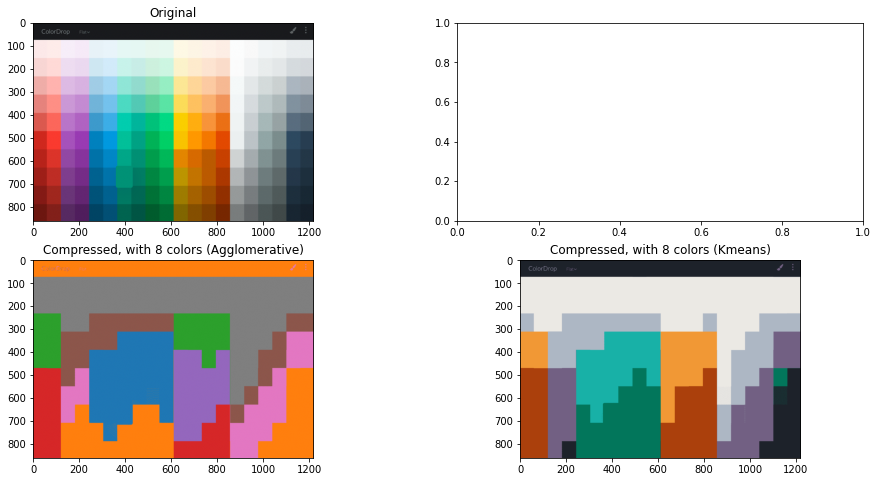

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0][0].imshow(im_2_flat)
ax[0][0].set_title('Original')
ax[0][0].grid(False)

ax[1][0].imshow(Ximg_recovered_ag/255)
ax[1][0].set_title('Compressed, with %d colors (Agglomerative)' % numberOfFinalColors)
ax[1][0].grid(False)

ax[1][1].imshow(Ximg_recovered_2k/255)
ax[1][1].set_title('Compressed, with %d colors (Kmeans)' % numberOfFinalColors)
ax[1][1].grid(False)

# Gaussian mixture models clustering

In [ ]:
def create_image(labels, df, colors, orig_flat_img, orig_img):
  color_dict = {}
  def add_to_dict(x):
    color_dict[(x['r'], x['g'], x['b'])] = colors[int(x['label'])]
  df = df_img_big.copy()
  df['label'] = labels
  df.apply(add_to_dict, axis=1)
  X = []
  for elem in orig_flat_img: 
    # for each line (rgb color) in original flattened image find the corresponding label
    current_color = color_dict[(elem[0], elem[1], elem[2])]
    X.append(np.array([current_color[0], current_color[1],current_color[2]]))
  X = np.asarray(X)
  X_rec = X.reshape(orig_img.shape)
  X_rec = X_rec * 255
  return X_rec

In [ ]:
df_img_big = get_unique_colors(Ximg)

number of rows in the original flattened img:  26069120
number of unique colors 411274


In [ ]:
gmm_full = mixture.GaussianMixture(n_components=numberOfFinalColors, covariance_type='full')
labels_full = gmm_full.fit(df_img_big).predict(df_img_big)

In [ ]:
gmm_diag = mixture.GaussianMixture(n_components=numberOfFinalColors, covariance_type='diag')
labels_diag = gmm_diag.fit(df_img_big).predict(df_img_big)

In [ ]:
gmm_sp = mixture.GaussianMixture(n_components=numberOfFinalColors, covariance_type='spherical')
labels_sp= gmm_sp.fit(df_img_big).predict(df_img_big)

In [ ]:
gmm_td = mixture.GaussianMixture(n_components=numberOfFinalColors, covariance_type='tied')
labels_td= gmm_td.fit(df_img_big).predict(df_img_big)

In [ ]:
full_img = create_image(labels_full, df_img_big, gmm_full.means_, Ximg, im)

In [ ]:
diag_img = create_image(labels_diag, df_img_big, gmm_diag.means_, Ximg, im)

In [ ]:
sp_img = create_image(labels_sp, df_img_big, gmm_sp.means_, Ximg, im)

In [ ]:
td_img = create_image(labels_td, df_img_big, gmm_td.means_, Ximg, im)

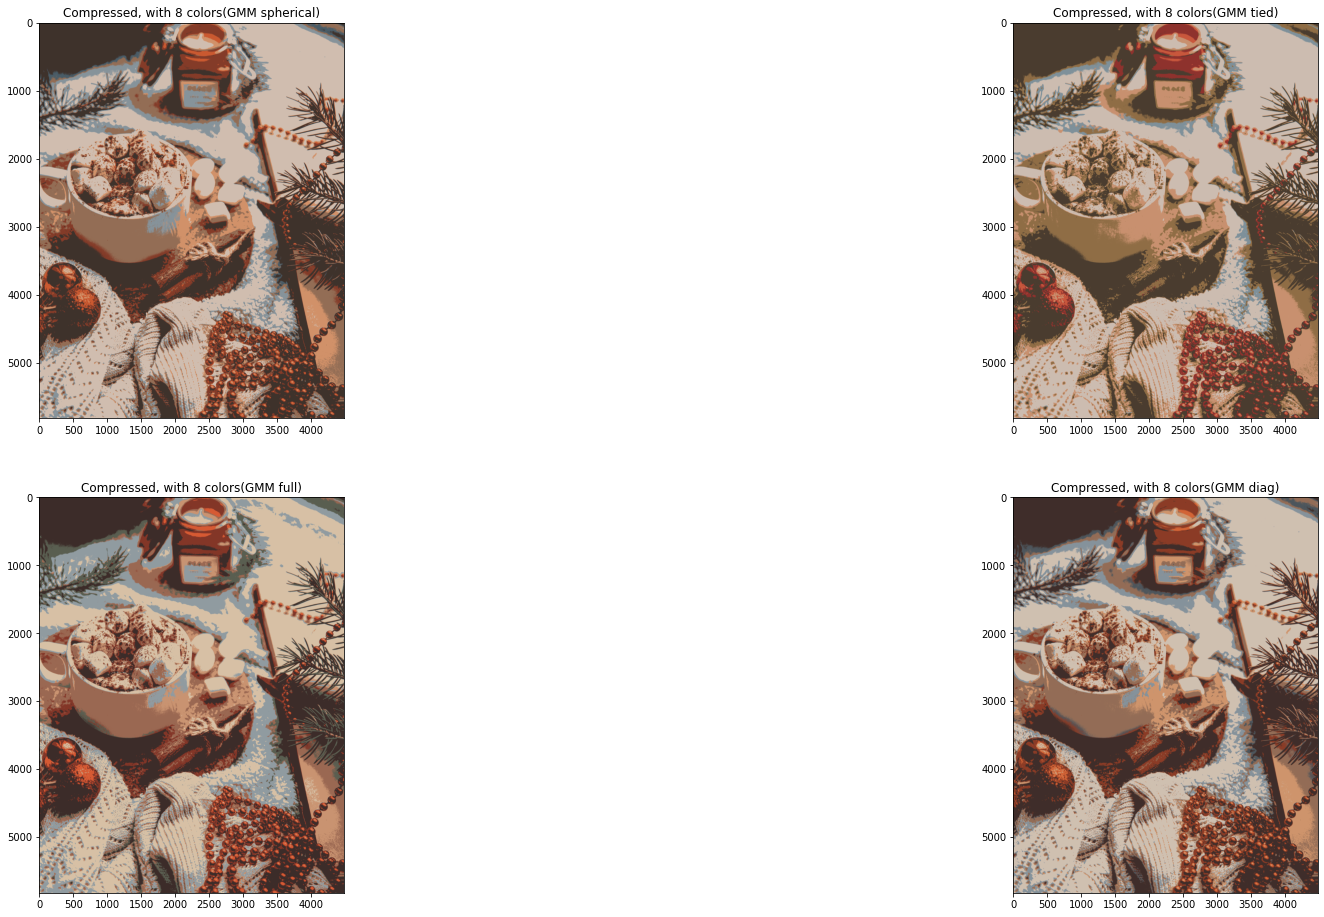

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(32, 16))
ax[1][0].imshow(full_img/255)
ax[1][0].set_title('Compressed, with %d colors(GMM full)' % numberOfFinalColors)
ax[1][0].grid(False)

ax[1][1].imshow(diag_img/255)
ax[1][1].set_title('Compressed, with %d colors(GMM diag)' % numberOfFinalColors)
ax[1][1].grid(False)

ax[0][0].imshow(sp_img/255)
ax[0][0].set_title('Compressed, with %d colors(GMM spherical)' % numberOfFinalColors)
ax[0][0].grid(False)

ax[0][1].imshow(td_img/255)
ax[0][1].set_title('Compressed, with %d colors(GMM tied)' % numberOfFinalColors)
ax[0][1].grid(False)

# DBSCAN (pycaret)

## Import Pycaret libraries

In [ ]:
!pip install pycaret[full]==2.3.4

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
from pycaret.utils import enable_colab
enable_colab()
from pycaret.datasets import get_data
from pycaret.clustering import *

Colab mode enabled.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Import new dataset

DBSCAN works better with sparce data and struggles to identify clusters within data of varying density. Which doest not relate to image colors. \
In order to demonstrate how it works and compare with KMeans I will use pycaret built-in dataset 'seeds'.

In [ ]:
dataset = get_data('facebook')

status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          1         0           0  
3          0         0           0  
4          0         0           0

In [ ]:
dataset['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
dataset['status_category'] = dataset['status_type'].astype("category")

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(7050, 13)

In [ ]:
newDataset = dataset.drop(labels=['status_type', 'status_id', 'status_published'], axis=1)

In [ ]:
newDataset.shape

(7050, 10)

In [ ]:
data = newDataset.sample(frac=0.9, random_state=786)
data_unseen = newDataset.drop(data.index)

In [ ]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

## Train Model

In [ ]:
cluster = setup(data, normalize=True, session_id=123)

Description                 Value
0                               session_id                   123
1                            Original Data            (6345, 10)
2                           Missing Values                 False
3                         Numeric Features                     8
4                     Categorical Features                     2
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (6345, 26)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  19a3
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
dbscan = create_model('dbscan')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.2399           147.3976  ...           0             0

[1 rows x 6 columns]

In [ ]:
kmeans = create_model('kmeans', num_clusters=6)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.6179          2196.2109  ...           0             0

[1 rows x 6 columns]

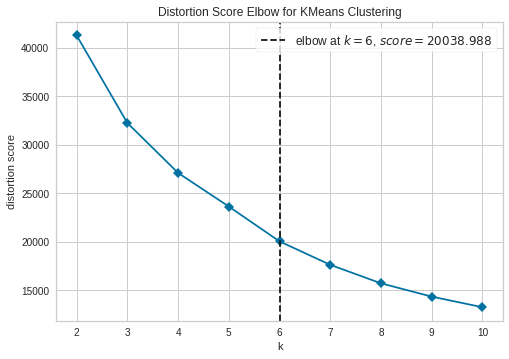

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
results_db = assign_model(dbscan)
results_kmeans = assign_model(kmeans)

In [ ]:
print("Number of clusters idendified by DBSCAN: ",len(results_db['Cluster'].unique()))

Number of clusters idendified by DBSCAN:  22


In [ ]:
kmeans22 = create_model('kmeans', num_clusters=22)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.5868          2055.0222  ...           0             0

[1 rows x 6 columns]

In [ ]:
results_kmeans22 = assign_model(kmeans22)

In [ ]:
plot_model(dbscan, 'tsne')

In [ ]:
plot_model(kmeans, 'tsne')

In [ ]:
plot_model(kmeans22, 'tsne')

# References: 

[machine-learning-workflows-python-scratch-part-2](https://www.kdnuggets.com/2017/06/machine-learning-workflows-python-scratch-part-2.html) \
[An interesting use case for the ML clustering algorithm](https://medium.com/analytics-vidhya/an-interesting-use-case-for-the-ml-clustering-algorithm-7901278164e7) \
[Clustering made easy with pycaret](https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080) \
[Clustering Tutorial (CLU101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Clustering%20Tutorial%20Level%20Beginner%20-%20CLU101.ipynb)